In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.style.use('bmh')

,Dist,Elev
1087,644.812448,1328.077786
1088,644.877301,1328.066410
1089,645.152564,1328.000000
1090,647.952783,1327.717504
1091,648.231627,1327.686805


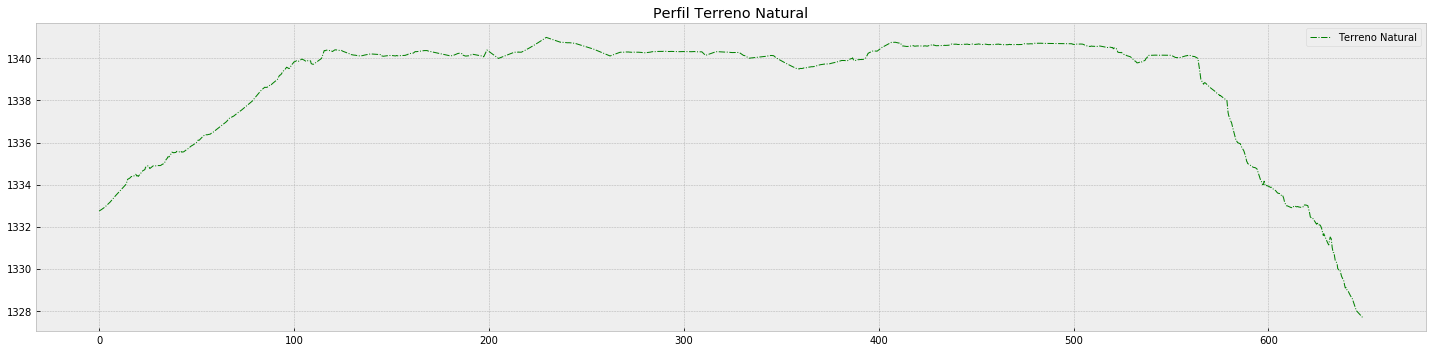

In [2]:
#fname = 'Profile_Analise'
#fname = 'ProfilePoints'
fname = 'ProfilePoints_1075'

df_Profile = pd.read_csv(fname + '.csv')

plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')

plt.legend()
plt.title('Perfil Terreno Natural')

plt.tight_layout()

df_Profile.tail()

## Calculo de Greide com Função Polynomial

In [3]:
Polynom = np.polyfit(df_Profile['Dist'], df_Profile['Elev'], np.floor(len(df_Profile['Dist']) * 0.05))
df_Profile['Greide'] = np.polyval(Polynom, df_Profile['Dist'])

df_Profile.tail()

c:\users\gomee11\documents\_apps\vscode\.python\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


,Dist,Elev,Greide
1087,644.812448,1328.077786,1328.096379
1088,644.877301,1328.066410,1328.086682
1089,645.152564,1328.000000,1328.046770
1090,647.952783,1327.717504,1327.722042
1091,648.231627,1327.686805,1327.690481


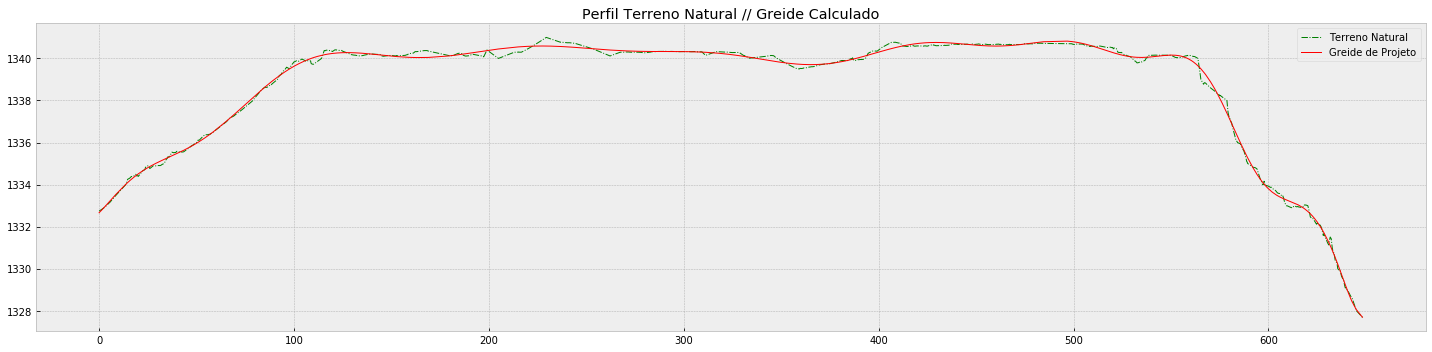

In [4]:
plt.figure(figsize=(20,5))

plt.plot(df_Profile['Dist'], df_Profile['Elev'], color='g', linestyle='-.', linewidth=1, label='Terreno Natural')
plt.plot(df_Profile['Dist'], df_Profile['Greide'], color='r', linewidth=1, label='Greide de Projeto')

plt.legend()
plt.title('Perfil Terreno Natural // Greide Calculado')

plt.tight_layout()

In [5]:
df_Profile[['Dist', 'Greide']].to_csv(fname + '_Greide.txt', sep=' ', index=False, header=False)

### Inclinação do Perfil
---

>Inclinacao = Desnivel / Distancia

In [6]:
df_Profile['Desnivel'] = df_Profile['Elev'] - df_Profile['Elev'].shift(1)
#df_Profile['Desnivel'] = df_Profile['Desnivel'].fillna(0)
df_Profile.tail()

,Dist,Elev,Greide,Desnivel
1087,644.812448,1328.077786,1328.096379,-0.062651
1088,644.877301,1328.066410,1328.086682,-0.011376
1089,645.152564,1328.000000,1328.046770,-0.066410
1090,647.952783,1327.717504,1327.722042,-0.282496
1091,648.231627,1327.686805,1327.690481,-0.030699


In [7]:
df_Profile['Inclinacao TN'] = (df_Profile['Desnivel'] / df_Profile['Dist'])
#df_Profile['Inclinacao TN'] = df_Profile['Inclinacao TN'].fillna(0)
df_Profile.head()

,Dist,Elev,Greide,Desnivel,Inclinacao TN
0,0.000000,1332.741260,1332.661705,NaN,NaN
1,1.216746,1332.811907,1332.776177,0.070647,0.058062
2,2.855847,1332.920762,1332.939125,0.108855,0.038117
3,3.778817,1333.000000,1333.033676,0.079238,0.020969
4,3.967454,1333.020661,1333.053155,0.020661,0.005208


In [8]:
inc = 0.08

tag_Elv = 'Elev ' + str(inc * 100) + '%'
tag_Inc = 'Inc ' + str(inc * 100) + '%'
tag_Des = 'Desnivel ' + str(inc * 100) + '%'

df_Profile[tag_Elv] = np.where(df_Profile['Inclinacao TN'] >= inc,
                               np.where(df_Profile['Desnivel'] > 0,
                                        df_Profile['Elev'] - (df_Profile['Desnivel'] - df_Profile['Desnivel'] * inc),
                                        df_Profile['Elev'] + (df_Profile['Desnivel'] - df_Profile['Desnivel'] * (- inc))
                                       ),
                               df_Profile['Elev']
                              )

df_Profile[tag_Des] = df_Profile[tag_Elv] - df_Profile[tag_Elv].shift(1)
df_Profile[tag_Inc] = (df_Profile[tag_Des] / df_Profile['Dist'])
df_Profile.head()

#df_Profile[['Elev', tag_Elv, 'Inclinacao TN', tag_Inc]]

,Dist,Elev,Greide,Desnivel,Inclinacao TN,Elev 8.0%,Desnivel 8.0%,Inc 8.0%
0,0.000000,1332.741260,1332.661705,NaN,NaN,1332.741260,NaN,NaN
1,1.216746,1332.811907,1332.776177,0.070647,0.058062,1332.811907,0.070647,0.058062
2,2.855847,1332.920762,1332.939125,0.108855,0.038117,1332.920762,0.108855,0.038117
3,3.778817,1333.000000,1333.033676,0.079238,0.020969,1333.000000,0.079238,0.020969
4,3.967454,1333.020661,1333.053155,0.020661,0.005208,1333.020661,0.020661,0.005208
